# AllLife Credit Card Customer Segmentation

## Background: 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective:
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

## Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

## Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

### Steps to follow:

1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods.(5marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

# 1. Import Libraries & Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
data_original = pd.read_excel('Credit Card Customer Data.xlsx')

In [3]:
# view dataset
data_original.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
# Drop first column: 'Sl_No'
data_original.drop('Sl_No', axis = 1, inplace = True)

In [5]:
# Create a copy of original dataset
data = data_original.copy()

In [6]:
# view dataset again
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [7]:
# shape of dataset
data.shape

(660, 6)

> The dataset has 660 rows and 6 columns/attributes.

# 2. Data Analysis & Preprocessing

In [8]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


> The dataset has no null values and all the datatypes are int64. (Also means that there are all numeric values and no wrong string imputations in the dataset)

In [9]:
# Check missing values
data.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

> There are no missing values in the dataset

In [10]:
# Statistical Summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


> Observations:
- Average Credit Card limit ranges from \\$3000 -\\$200,000 with 50% of the customers having limit about \\$18,000. (This seems to be left-skewed distribution)
- Total number of Credit Cards lie between 1-10 i.e. customers who atleast 1 credit card are included in the dataset, therefore no new customers. Also 50% of the customers have atleast 5 credit cards.
- There are customers who never visit the bank whereas some of them who go to bank about 5 times. About 50% of people visit bank about 2 times for their queries. 
- There are customers who never visit online whereas some of them who go online about 15 times. About 50% of people visit online about 2 times for their queries.
- There are customers who never call the bank whereas some of them who call the bank about 10 times. About 50% of people call bank about 3 times for their queries.

In [11]:
# check unique values
data.nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

> Since the unique values for 'Customer Key' is 655 means there are 655 customers. However, the shape of dataset shows 660 rows, hence there are duplicate values for 'Customer Key' which should be taken care of.

In [12]:
# Pandas Profiling
#import pandas_profiling
#pandas_profiling.ProfileReport(data).to_file('output.html')

In [13]:
# check duplicate values
data[data.duplicated()==True]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


> There are no similar/duplicate rows in the dataset. However, we need to check if there are duplicate Customer Keys representing the same customers.

In [14]:
# Check duplicate 'Customer Key' values
data[data['Customer Key'].duplicated() == True]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,47437,17000,7,3,1,0
398,96929,67000,6,2,2,2
432,37252,59000,6,2,1,2
541,50706,60000,7,5,2,2
632,97935,187000,7,1,7,0


> There are 5 duplicate values for 'Customer Key'. Lets check the 'Avg_Credit_Limit' for duplicate values and drop one of the duplicates accordingly.

In [15]:
# Check 'Avg_Credit_Limit' for duplicate 'Customer Key'
keys = [47437, 96929, 37252, 50706, 97935]
df = data[data['Customer Key'].isin(keys)]
df = df.sort_values(by = 'Customer Key')
df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


In [16]:
# Keep the 'Customer Key' with the maximum 'Avg_Credit_Limit' 
# Hence, removing the 'Customer Key' with minimum value for 'Avg_Credit_Limit'
df.groupby('Customer Key')['Avg_Credit_Limit'].min()

Customer Key
37252     6000
47437    17000
50706    44000
96929    13000
97935    17000
Name: Avg_Credit_Limit, dtype: int64

In [17]:
# Drop rows with duplicated 'Customer Key' with minimum 'Avg_Credit_Limit'
index_to_remove = [48, 332, 411, 391, 104]
data.drop(index_to_remove, axis = 0, inplace = True)

In [18]:
# Check duplicate 'Customer key' again
data[data['Customer Key'].duplicated() == True]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


> There are no duplicate 'Customer Key' values anymore.

## 2a. Univariate Analysis:

In [19]:
# Names of columns of dataset
data.columns

Index(['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [20]:
# Remove the 'Customer Key' column as it has all unique/distinct values
# The keys wont be used for grouping data.
data.drop('Customer Key', axis = 1, inplace = True)

In [21]:
# Check value counts for all columns/attributes
cols = ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
for i in cols:
    print(data[i].value_counts())
    print(" ")

8000      35
6000      30
9000      28
13000     27
10000     26
          ..
25000      1
153000     1
111000     1
112000     1
106000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64
 
4     148
6     117
7     100
5      74
2      63
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64
 
2    158
1    111
3     99
0     99
5     96
4     92
Name: Total_visits_bank, dtype: int64
 
2     187
0     142
1     108
4      69
5      54
3      44
15     10
7       7
12      6
10      6
8       6
13      5
11      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64
 
4     108
0      95
2      90
1      90
3      83
6      39
7      35
9      32
8      29
5      29
10     25
Name: Total_calls_made, dtype: int64
 


> Observations:
- Mostly 'Avg_Credit_Limit' is \\$8000
- Majority of people have 4 total credit cards
- Mostly people visit banks twice, approach online twice and make calls to the bank four times in total. 

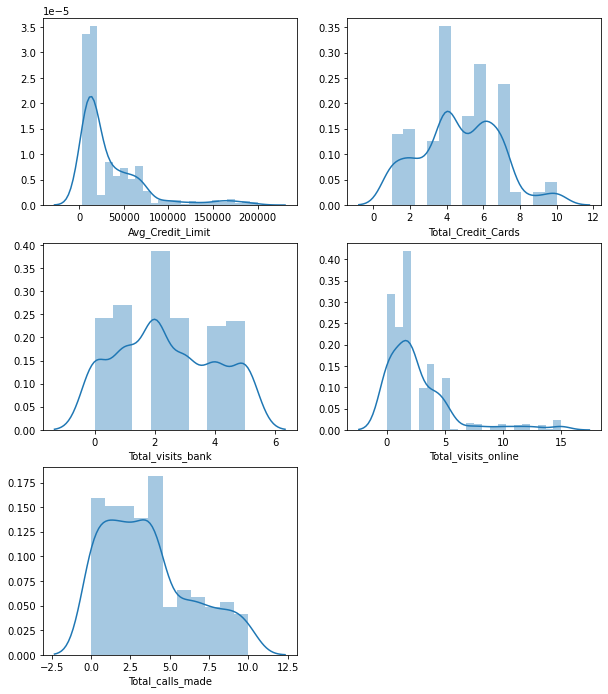

In [22]:
# Plot all attributes: Histogram/distplot
plt.figure(figsize = (10,20))
pos = 1
for i in cols:
    plt.subplot(5,2,pos)
    sns.distplot(data[i]);
    pos += 1

> Observations:
- 'Avg_Credit_Limit' and 'Total_visits_online' appear to be left-skewed.

In [23]:
# Percentage of customers 
for i in cols:
    print(" ")
    print("Percentage of customers according to ", i)
    print(data[i].value_counts(normalize = True)*100)
    

 
Percentage of customers according to  Avg_Credit_Limit
8000      5.343511
6000      4.580153
9000      4.274809
13000     4.122137
10000     3.969466
            ...   
25000     0.152672
153000    0.152672
111000    0.152672
112000    0.152672
106000    0.152672
Name: Avg_Credit_Limit, Length: 110, dtype: float64
 
Percentage of customers according to  Total_Credit_Cards
4     22.595420
6     17.862595
7     15.267176
5     11.297710
2      9.618321
1      9.007634
3      8.091603
10     2.900763
9      1.679389
8      1.679389
Name: Total_Credit_Cards, dtype: float64
 
Percentage of customers according to  Total_visits_bank
2    24.122137
1    16.946565
3    15.114504
0    15.114504
5    14.656489
4    14.045802
Name: Total_visits_bank, dtype: float64
 
Percentage of customers according to  Total_visits_online
2     28.549618
0     21.679389
1     16.488550
4     10.534351
5      8.244275
3      6.717557
15     1.526718
7      1.068702
12     0.916031
10     0.916031
8      0.91603

> Observations: (<b> IMPORTANT TRENDS </b>)
- Majority of the customers (5.3% of all) have average credit limit of \\$8000 whereas minority of the customers (0.15% of all) have the credit limit of \\$106,000.
- Majority of the customers (22.59% of all) have total 4 credit cards whereas minority of the customers (1.67% of all) have total 8 credit cards.
- Majority of the customers (24.12% of all) have visit the bank 2 times whereas minority of the customers (14.04% of all) visit the bank 4 times.
- Majority of the customers (28.54% of all) have visit online 2 times whereas minority of the customers (0.15% of all) visit the online 6 times.
- Majority of the customers (16.48% of all) have call the bank 4 times whereas minority of the customers (3.81% of all) call the bank 10 times.

In [24]:
# check skewed distribution
data.skew()

Avg_Credit_Limit       2.193141
Total_Credit_Cards     0.141287
Total_visits_bank      0.142998
Total_visits_online    2.217058
Total_calls_made       0.659476
dtype: float64

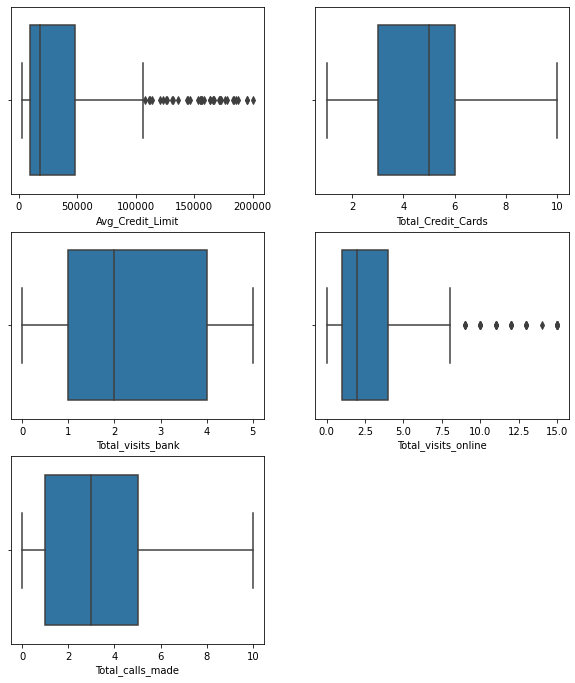

In [25]:
# Check outliers using boxplots
plt.figure(figsize= (10,20))
pos = 1
for i in cols:
    plt.subplot(5,2, pos)
    sns.boxplot(data[i]);
    pos += 1  

> Both 'Avg_Credit_Limit' and 'Total_visits_online' are left-skewed and have outliers. But we do not treat them since we keep the original range of values. 

## 2b. Bivariate Analysis:

In [26]:
# Correlation
data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.610227,-0.102314,0.551581,-0.416628
Total_Credit_Cards,0.610227,1.000000,0.317103,0.167892,-0.651979
Total_visits_bank,-0.102314,0.317103,1.000000,-0.552223,-0.501813
Total_visits_online,0.551581,0.167892,-0.552223,1.000000,0.126250
Total_calls_made,-0.416628,-0.651979,-0.501813,0.126250,1.000000


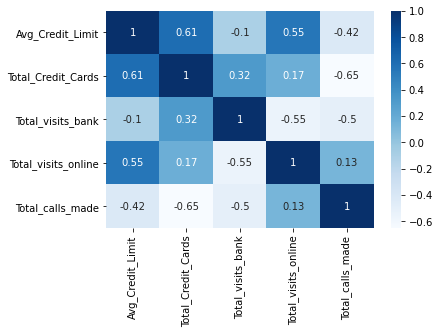

In [27]:
# Heatmap for correlation
sns.heatmap(data.corr(), cmap = 'Blues', annot = True);

> Observations: (<b> IMPORTANT TRENDS </b>)
- High positive correlation:
    - 'Avg_Credit_Limit' appears to highly positively correlated to the 'Total_Credit_Cards' i.e. people who have more number of credit cards tend to have higher average credit card limit.
    - Other high positive correlations are between 'Total_Credit_Cards' & 'Total_visits_bank' and 'Total_visits_online' & 'Total_calls_made i.e. people with more number of credit cards mostly visit banks and people who go online for their concerns also make calls to the bank. 
- High negative correlation:
    - There is a high negative correlation between 'Total_Credit_Cards' and 'Total_calls_made' i.e. people who have more number of credit cards tend to make lesser calls to the bank.
    - There is also a higher negative correlation between 'Total_visits_bank' and 'Total_visits_online' i.e. people who mostly visit bank for credit cards issues generally go online lesser for their concerns. 
    - There is similar higher negative correlation between 'Total_visits_bank' and 'Total_calls_made' i.e. people who mostly visit bank for credit card issues tend to make lesser calls for their concerns.
- Hence, People who have more number of credit cards mostly have higher average credit limit and usually go to the banks for the queries instead of calling the bank. Also, people who mostly go to the bank for their concerns go less online/ make calls to the bank. 

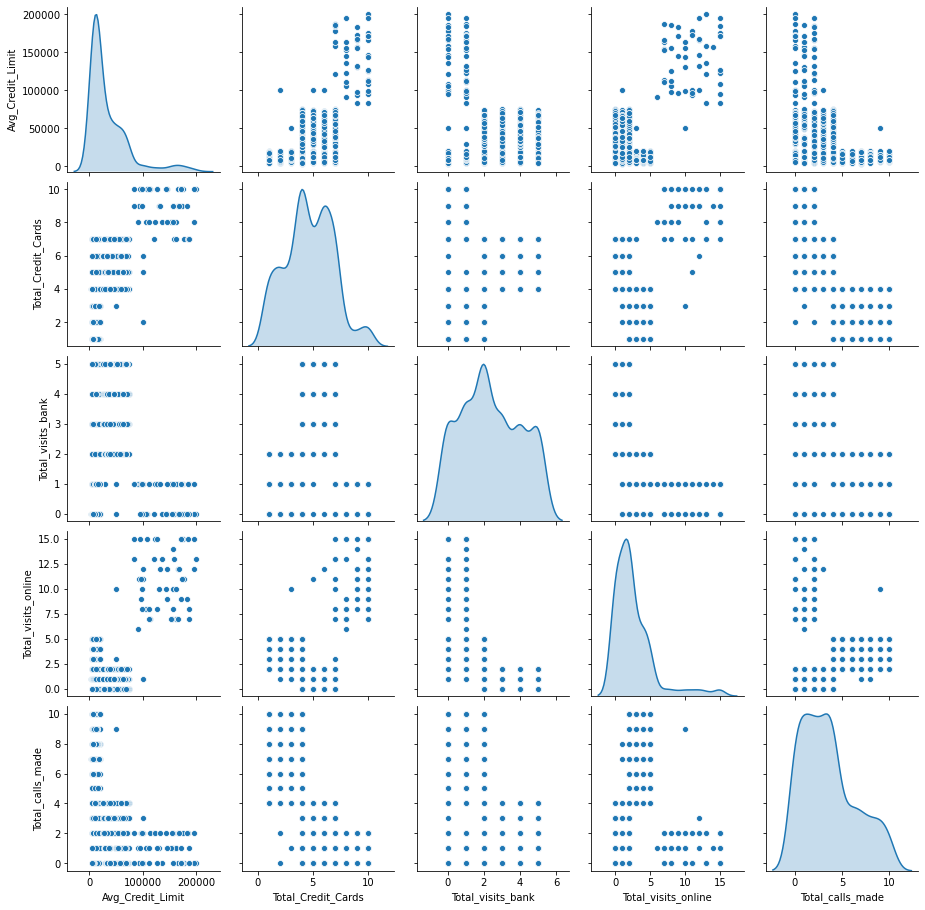

In [28]:
# Plot pair-wise relationship between attributes
sns.pairplot(data, diag_kind = 'kde');

> From the diagonal plots, there seems to be 3-5 peaks i.e. optimal number of clusters should be 3, 4 or 5. <Br> Since there are 6 features/attributes so the dataset represent 6 different dimensions, hence there could be peaks in different directions. Hence, these plots are not sufficient to determine the groups/clusters of the data.  

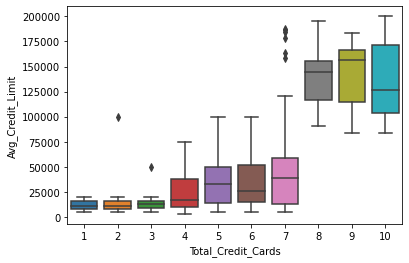

In [29]:
# Relationship between total credit cards and average credit limit
sns.boxplot(data['Total_Credit_Cards'], data['Avg_Credit_Limit']);

> Observations:
- People who have 1-3 credit cards have average credit limit in the range of \\$10,000 - \\$20,000
- People who have 4-7 credit cards have average credit limit in the range of \\$10,000 - \\$35,000
- People who have 8-10 credit cards have average credit limit in the range of \\$115,000 - \\$160,000
- Hence, there seems to be 3 optimum clusters/groups of customers.

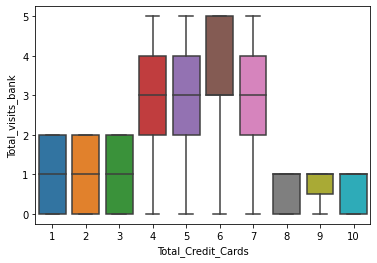

In [30]:
# Relationship between total number of credit cards and total visits to bank
sns.boxplot(data['Total_Credit_Cards'], data['Total_visits_bank']);

> Observations:
- People who have 1-3 credit cards mostly visit bank 0-2 times in total.
- People who have 4-7 credit cards mostly visit bank 2-4 times in total.
- People who have 8-10 credit cards mostly visit bank 0-1 time in total.
- Hence, there seems to be 3 optimum clusters/groups of customers.

# 3. Models: 

## 3a. KMeans Clustering:

In [31]:
# Scaling the dataset (zscore)
from scipy.stats import zscore
dataset = data.copy()
dataset = dataset.apply(zscore)
dataset.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.732369,-1.249105,-0.860646,-0.550400,-1.256040
1,0.406101,-0.788168,-1.475392,2.510549,1.901468
2,0.406101,1.055582,-0.860646,0.129811,0.147297
3,-0.124406,0.133707,-0.860646,-0.550400,0.147297
4,1.732369,0.594644,-1.475392,3.190759,-0.203537


In [32]:
# Calculate within sum of squares error for different number of clusters
from sklearn.cluster import KMeans
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(dataset)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"number of clusters": cluster_range,
                           "WSSE/Cluster Error": cluster_errors})
clusters_df


,number of clusters,WSSE/Cluster Error
0,1,3275.000000
1,2,2027.386090
2,3,926.079337
3,4,774.625025
4,5,712.145555
5,6,637.259704
6,7,600.580186
7,8,572.428223
8,9,552.110135
9,10,510.420675


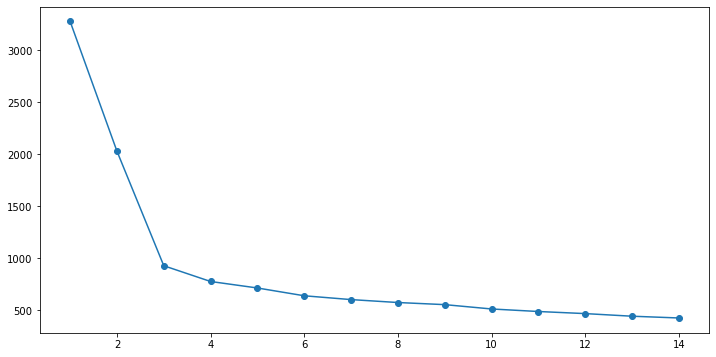

In [33]:
# Elbow Method: plot cluster error(WSSE) for different number of clusters
plt.figure(figsize = (12,6))
plt.plot(clusters_df['number of clusters'], clusters_df['WSSE/Cluster Error'], marker = 'o')

> The elbow is at number of clusters = 3 so optimal number of clusters is 3.  

In [34]:
# Use kmeans with number of clusters = 3
kmeans = KMeans(n_clusters = 3, n_init = 5, random_state = 0)
kmeans.fit(dataset)

KMeans(n_clusters=3, n_init=5, random_state=0)

In [35]:
# check number of data in each cluster
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[222 383  50]


In [36]:
# centroids of each cluster
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(dataset))
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,-0.597083,-0.022183,2.820969
Total_Credit_Cards,-1.062239,0.373202,1.857613
Total_visits_bank,-0.899413,0.665788,-1.106544
Total_visits_online,0.322844,-0.554840,2.816644
Total_calls_made,1.147648,-0.550708,-0.877139


In [37]:
# Add values of 'group' in dataset and make it a 'categorical' data type
predictions = kmeans.predict(dataset)
dataset['group'] = predictions
dataset['group'] = dataset['group'].astype('category')
dataset.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,1.732369,-1.249105,-0.860646,-0.550400,-1.256040,1
1,0.406101,-0.788168,-1.475392,2.510549,1.901468,0
2,0.406101,1.055582,-0.860646,0.129811,0.147297,1
3,-0.124406,0.133707,-0.860646,-0.550400,0.147297,1
4,1.732369,0.594644,-1.475392,3.190759,-0.203537,2


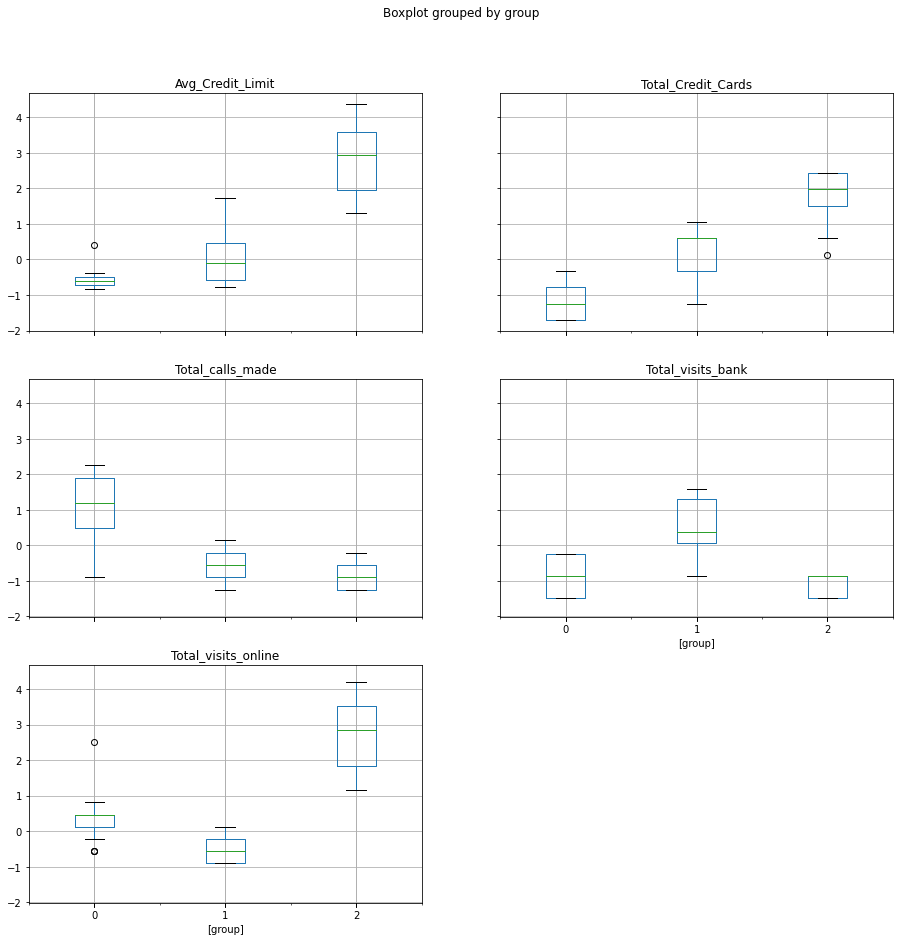

In [38]:
# Visualize the centers; visualize boxplots of clusters in scaled dataset
dataset.boxplot(by='group', figsize = (15,15));

> Observations:
- Customers in group 2 (3rd cluster) have more number of credit cards, highest range for average credit limit, and visit online maximum number of times for their queries.
- Customers in group 0 (1st cluster) have least number of credit cards, lowest range for average credit limit, and make the maximum number of calls to the bank for their concerns.
- Customers in group 1 (2nd cluster) have about average number of credit cards, with little less than average credit limit, and  mostly visit the bank for their queries. 

In [39]:
# Dataframe depicting trends/characteristics of clusters formed by KMeans
df_kmeans = pd.DataFrame({"Cluster no." : [0,1,2],
                         "Total Credit Cards" : ['Low', 'Medium', 'High'],
                         "Average Credit Limit" : ['Low', 'Medium', 'High'],
                         "Contact Method" : ['Make Calls', 'Visit Bank', 'Visit Online']})
df_kmeans

,Cluster no.,Total Credit Cards,Average Credit Limit,Contact Method
0,0,Low,Low,Make Calls
1,1,Medium,Medium,Visit Bank
2,2,High,High,Visit Online


In [40]:
# silhoutte score for number of clusters = 3
from sklearn.metrics import silhouette_score
score_kmeans = silhouette_score(dataset, kmeans.labels_)
print(score_kmeans)

0.5395774903633755


2
3
4
5
6
7
8
9
10
11


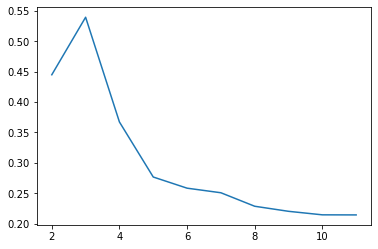

In [41]:
# plot silhouette score for different number of clusters
scores = []
for i in range(2,12):
    kmeans =KMeans(n_clusters = i, n_init = 5, random_state = 0)
    kmeans.fit(dataset)
    print(i)
    score = silhouette_score(dataset, kmeans.labels_)
    scores.append(score)
    
plt.plot(range(2,12), scores)
plt.show()

> Since, silhoutte score is highest (close to 1) for number of clusters = 3, therefore, optimal number of clusters is 3. 

## 3b. Hierarchical Clustering:

In [42]:
# Create another copy of original dataset 
datasetH = data.copy()
datasetH.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [43]:
# Scale the dataset (zscore)
datasetH = datasetH.apply(zscore)

In [44]:
# Create Dendrograms to find optimal number of clusters
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

# linkage methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median','ward']
# distance metrics = ['euclidean', 'jaccard', 'minkowski','chebyshev']

> cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram. The closer it is to 1, the better is the clustering. 

In [45]:
# calculating cophenetic index for distance = 'euclidean' and different linkage methods
for i in ['single', 'complete', 'average', 'weighted', 'centroid', 'median','ward']:
    Z = linkage(datasetH, metric = 'euclidean', method = i)
    c, coph_dists = cophenet(Z, pdist(datasetH))
    print(i)
    print(c)      

single
0.7391473713405818
complete
0.8758017442817639
average
0.8971061215847376
weighted
0.8746689772570894
centroid
0.8938725248289437
median
0.8808400355320603
ward
0.7416585017721558


> The best value of c = 0.897 for distance = 'euclidean' and method = 'average'.

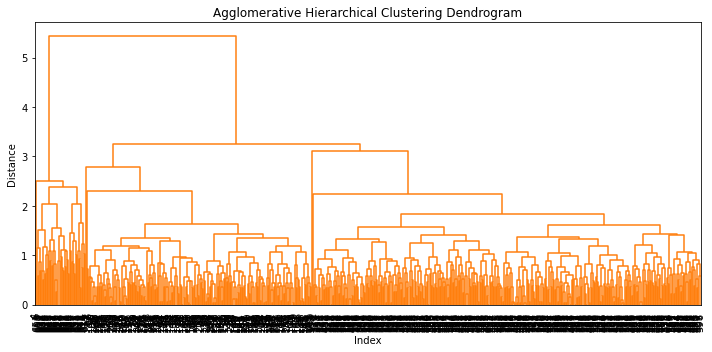

In [46]:
# Plot Dendrogram
Z1 = linkage(datasetH, metric = 'euclidean', method = 'average')
plt.figure(figsize = (10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation = 90, color_threshold = 52, leaf_font_size = 10)
plt.tight_layout()

In [47]:
print(Z1.shape)

(654, 4)


In [48]:
# calculating cophenetic index for distance = 'jaccard' and different linkage methods
for i in ['single', 'complete', 'average', 'weighted']:
    Z = linkage(datasetH, metric = 'jaccard', method = i)
    c, coph_dists = cophenet(Z, pdist(datasetH))
    print(i)
    print(c) 

single
0.7079852086615688
complete
0.18237489052473685
average
0.5214976057796517
weighted
0.4318461700014751


> The best value of c = 0.707 for distance = 'jaccard' and method = 'single'.

In [49]:
# calculating cophenetic index for distance = 'minkowski' and different linkage methods
for i in ['single', 'complete', 'average', 'weighted']:
    Z = linkage(datasetH, metric = 'minkowski', method = i)
    c, coph_dists = cophenet(Z, pdist(datasetH))
    print(i)
    print(c) 

single
0.7391473713405818
complete
0.8758017442817639
average
0.8971061215847376
weighted
0.8746689772570894


> The best value of c = 0.897 for distance = 'minkowski' and method = 'weighted'.

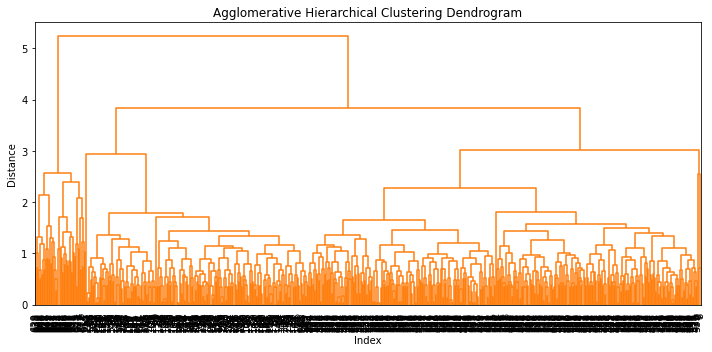

In [50]:
# Plot Dendrogram
Z3 = linkage(datasetH, metric = 'minkowski', method = 'weighted')
plt.figure(figsize = (10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z3, leaf_rotation = 90, color_threshold = 52, leaf_font_size = 10)
plt.tight_layout()

In [51]:
print(Z3.shape)

(654, 4)


In [52]:
# calculating cophenetic index for distance = 'chebyshev'' and different linkage methods
for i in ['single', 'complete', 'average', 'weighted']:
    Z = linkage(datasetH, metric = 'chebyshev', method = i)
    c, coph_dists = cophenet(Z, pdist(datasetH))
    print(i)
    print(c) 

single
0.7377009257150868
complete
0.8626209788676898
average
0.8952075169385171
weighted
0.8295594595735697


> The best value of c = 0.895 for distance = 'chebyshev' and method = 'average'.

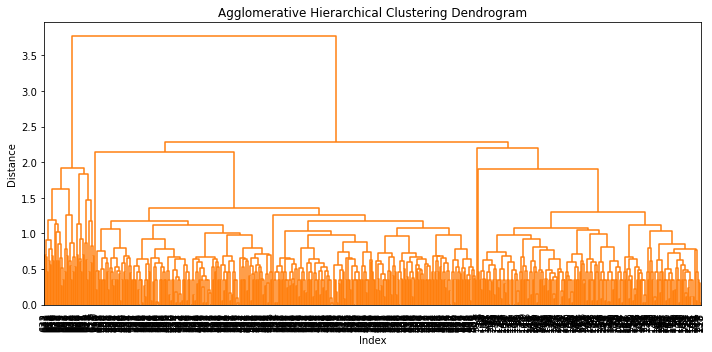

In [53]:
# Plot Dendrogram
Z4 = linkage(datasetH, metric = 'chebyshev', method = 'average')
plt.figure(figsize = (10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z4, leaf_rotation = 90, color_threshold = 52, leaf_font_size = 10)
plt.tight_layout()

In [54]:
print(Z4.shape)

(654, 4)


> <b>Hence, we have three different dendrograms with cophenetic coefficient about 0.89 and different combinations of distance metric and method to measure distance between data points and clusters. </b> <Br> The 3 combinations are:
           - metric = 'euclidean' , method = 'average'
           - metric = 'minkowski', method = 'weighted'
           - metric = 'chebyshev' and method = 'average'

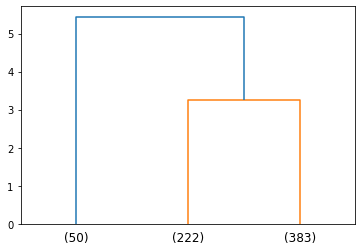

In [55]:
# truncate dendrogram
dendrogram(Z1, truncate_mode = 'lastp', p = 3)
plt.show()

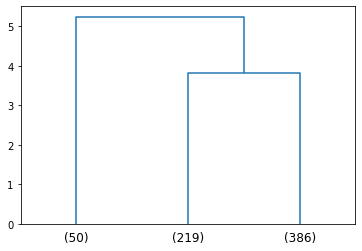

In [56]:
# truncate dendrogram
dendrogram(Z3, truncate_mode = 'lastp', p = 3)
plt.show()

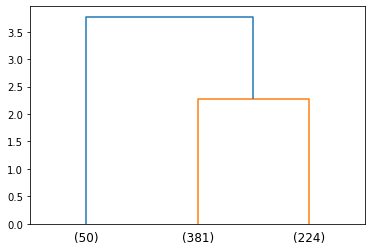

In [57]:
# truncate dendrogram
dendrogram(Z4, truncate_mode = 'lastp', p = 3)
plt.show()

In [58]:
max_d = 3.2
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z1, max_d, criterion='distance')
clusters

array([3, 2, 3, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

> optimum number of clusters from the dendrogram = 3 clusters. <Br> <b> We choose metric = 'euclidean' and method = 'average' for our case.</b>

In [59]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3,
                               affinity = 'euclidean',
                               linkage = 'average')
model.fit(datasetH)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [60]:
# Add group/cluster number to dataset
datasetH['labels'] = model.labels_

In [61]:
datasetH.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.732369,-1.249105,-0.860646,-0.550400,-1.256040,0
1,0.406101,-0.788168,-1.475392,2.510549,1.901468,2
2,0.406101,1.055582,-0.860646,0.129811,0.147297,0
3,-0.124406,0.133707,-0.860646,-0.550400,0.147297,2
4,1.732369,0.594644,-1.475392,3.190759,-0.203537,1


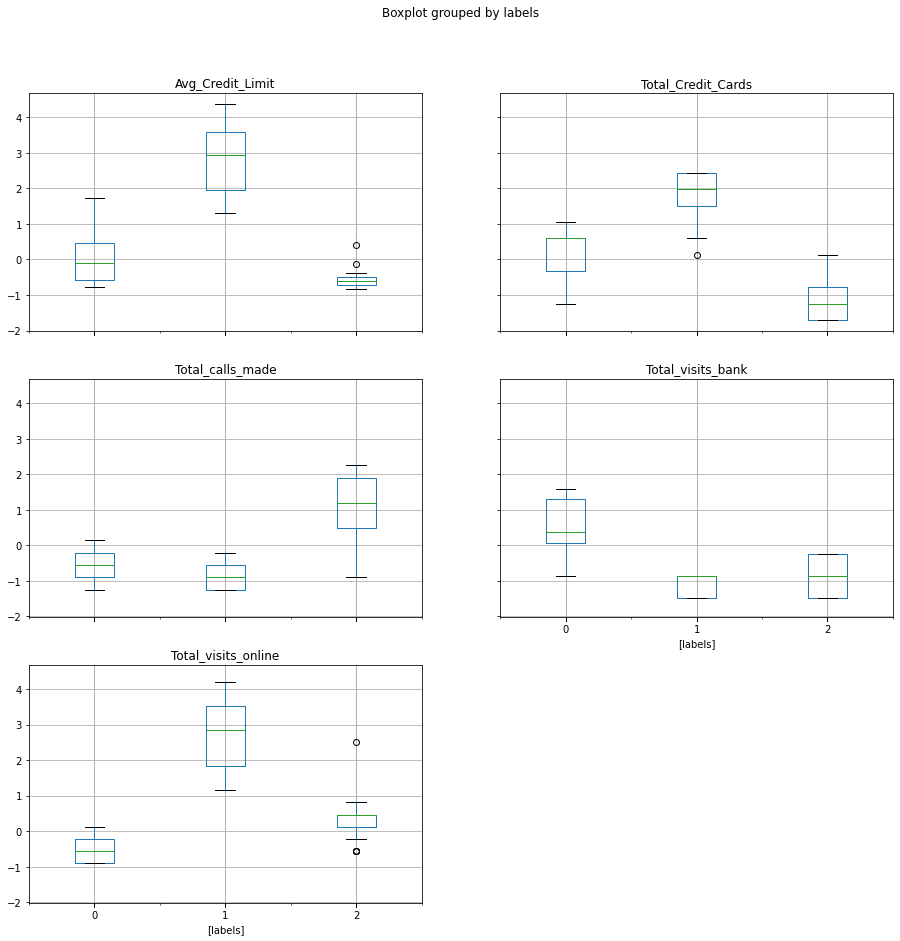

In [62]:
# Visualize clusters
datasetH.boxplot(by='labels', figsize = (15,15));

> Observations:
- Customers in group 1 (2nd cluster) have more number of credit cards, highest range for average credit limit, and visit online maximum number of times for their queries.
- Customers in group 2 (3rd cluster) have least number of credit cards, lowest range for average credit limit, and make the maximum number of calls to the bank for their concerns.
- Customers in group 0 (1st cluster) have about average number of credit cards, with little less than average credit limit, and  mostly visit the bank for their queries.

In [63]:
# Dataframe depicting trends/characteristics of clusters formed by Hierarchical
df_hierarchical = pd.DataFrame({"Cluster no." : [0,1,2],
                         "Total Credit Cards" : ['Medium','High','Low'],
                         "Average Credit Limit" : ['Medium','High','Low'],
                         "Contact Method" : ['Visit Bank', 'Visit Online', 'Make Calls']})
df_hierarchical

,Cluster no.,Total Credit Cards,Average Credit Limit,Contact Method
0,0,Medium,Medium,Visit Bank
1,1,High,High,Visit Online
2,2,Low,Low,Make Calls


In [64]:
# silhoutte score
from sklearn.metrics import silhouette_score
score_hierarchical = silhouette_score(datasetH, model.labels_)
print(score_hierarchical)

0.5904746612930871


2
3
4
5
6
7


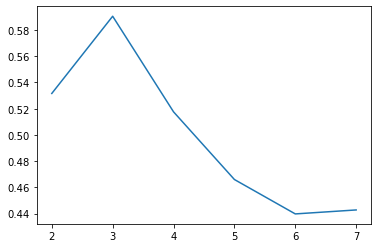

In [65]:
# plot silhouette score for different number of clusters
scores = []
for i in range(2,8):
    model = AgglomerativeClustering(n_clusters = i,
                                   affinity = 'euclidean',
                                   linkage = 'average')
    model.fit(datasetH)
    print(i)
    score = silhouette_score(datasetH, model.labels_)
    scores.append(score)
    
plt.plot(range(2,8), scores)
plt.show()

> Since, silhoutte score is highest (close to 1) for number of clusters = 3, therefore, optimal number of clusters is 3.

## 3c. Comparing KMeans & Hierarchical Clustering:

### Group by cluster labels:

In [66]:
dataset.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,1.732369,-1.249105,-0.860646,-0.550400,-1.256040,1
1,0.406101,-0.788168,-1.475392,2.510549,1.901468,0
2,0.406101,1.055582,-0.860646,0.129811,0.147297,1
3,-0.124406,0.133707,-0.860646,-0.550400,0.147297,1
4,1.732369,0.594644,-1.475392,3.190759,-0.203537,2


In [67]:
datasetH.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.732369,-1.249105,-0.860646,-0.550400,-1.256040,0
1,0.406101,-0.788168,-1.475392,2.510549,1.901468,2
2,0.406101,1.055582,-0.860646,0.129811,0.147297,0
3,-0.124406,0.133707,-0.860646,-0.550400,0.147297,2
4,1.732369,0.594644,-1.475392,3.190759,-0.203537,1


In [68]:
# Add clusters to original dataset
data_original['KMeans_label'] = dataset['group']
data_original['Hierarchical_label'] = datasetH['labels']

In [69]:
data_original.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_label,Hierarchical_label
0,87073,100000,2,1,1,0,1,0.0
1,38414,50000,3,0,10,9,0,2.0
2,17341,50000,7,1,3,4,1,0.0
3,40496,30000,5,1,1,4,1,2.0
4,47437,100000,6,0,12,3,2,1.0


In [70]:
# Statistical Summary of dataset for different clusters 
df1 = data_original.groupby('KMeans_label').describe().T
df1

KMeans_label                          0              1              2
Customer Key        count    222.000000     383.000000      50.000000
                    mean   55128.536036   54801.882507   56708.760000
                    std    25924.359359   25314.312166   26862.130097
                    min    11412.000000   11265.000000   13315.000000
                    25%    33219.500000   34459.000000   32897.250000
                    50%    55235.500000   53002.000000   53875.000000
                    75%    75852.500000   76724.500000   79713.750000
                    max    99596.000000   99473.000000   99843.000000
Avg_Credit_Limit    count    222.000000     383.000000      50.000000
                    mean   12180.180180   33853.785901  141040.000000
                    std     5246.327219   22208.071973   34457.877272
                    min     3000.000000    5000.000000   84000.000000
                    25%     8000.000000   13000.000000  108750.000000
                    50%    12000.000000   31000.000000  145500.000000
                    75%    16000.000000   52000.000000  170000.000000
                    max    50000.000000  100000.000000  200000.000000
Total_Credit_Cards  count    222.000000     383.000000      50.000000
                    mean       2.405405       5.519582       8.740000
                    std        1.100213       1.136730       1.274715
                    min        1.000000       2.000000       5.000000
                    25%        1.000000       4.000000       8.000000
                    50%        2.000000       6.000000       9.000000
                    75%        3.000000       6.000000      10.000000
                    max        4.000000       7.000000      10.000000
Total_visits_bank   count    222.000000     383.000000      50.000000
                    mean       0.936937       3.483029       0.600000
                    std        0.804729       1.134467       0.494872
                    min        0.000000       1.000000       0.000000
                    25%        0.000000       2.500000       0.000000
                    50%        1.000000       3.000000       1.000000
                    75%        2.000000       4.500000       1.000000
                    max        2.000000       5.000000       1.000000
Total_visits_online count    222.000000     383.000000      50.000000
                    mean       3.567568       0.986945      10.900000
                    std        1.215448       0.857573       2.880264
                    min        1.000000       0.000000       6.000000
                    25%        3.000000       0.000000       8.000000
                    50%        4.000000       1.000000      11.000000
                    75%        4.000000       2.000000      13.000000
                    max       10.000000       3.000000      15.000000
Total_calls_made    count    222.000000     383.000000      50.000000
                    mean       6.851351       2.010444       1.080000
                    std        1.986487       1.428907       0.876915
                    min        1.000000       0.000000       0.000000
                    25%        5.000000       1.000000       0.000000
                    50%        7.000000       2.000000       1.000000
                    75%        9.000000       3.000000       2.000000
                    max       10.000000       4.000000       3.000000
Hierarchical_label  count    222.000000     383.000000      50.000000
                    mean       1.990991       0.005222       1.000000
                    std        0.134231       0.102195       0.000000
                    min        0.000000       0.000000       1.000000
                    25%        2.000000       0.000000       1.000000
                    50%        2.000000       0.000000       1.000000
                    75%        2.000000       0.000000       1.000000
                    max        2.000000       2.000000       1.000000

> Analysis:
- For group 0: (Cluster name - Low Customers)
    - range for average credit limit is \\$3000 -\\$50,000 with median \\$12,000.
    - range for total credit cards is 1-4.
    - total visits to bank is 0-2 times.
    - total visits online are 1-10 times.
    - calls made are 1-10 times.
- For group 1: (Cluster name - Medium Customers)
    - range for average credit limit is \\$5000 -\\$100,000 with median \\$31,000..
    - range for total credit cards is 4-7.
    - total visits to bank is 1-5 times.
    - total visits online are 0-3 times.
    - calls made are 0-4 times.
- For group 2: (Cluster name - High Customers)
    - range for average credit limit is \\$84000 -\\$200,000 with median \\$145,500.
    - range for total credit cards is 5-10.
    - total visits to bank is 0-1 times.
    - total visits online are 6-15 times.
    - calls made are 0-3 times.  


In [71]:
df2 = data_original.groupby('Hierarchical_label').describe().T
df2

Hierarchical_label                   0.0            1.0           2.0
Customer Key        count     383.000000      50.000000    222.000000
                    mean    54884.545692   56708.760000  54985.923423
                    std     25319.166372   26862.130097  25917.347191
                    min     11265.000000   13315.000000  11412.000000
                    25%     34459.000000   32897.250000  33219.500000
                    50%     53166.000000   53875.000000  54990.500000
                    75%     76724.500000   79713.750000  75852.500000
                    max     99473.000000   99843.000000  99596.000000
Avg_Credit_Limit    count     383.000000      50.000000    222.000000
                    mean    33793.733681  141040.000000  12283.783784
                    std     22249.578204   34457.877272   5369.227563
                    min      5000.000000   84000.000000   3000.000000
                    25%     13000.000000  108750.000000   8000.000000
                    50%     31000.000000  145500.000000  12000.000000
                    75%     52000.000000  170000.000000  16000.000000
                    max    100000.000000  200000.000000  50000.000000
Total_Credit_Cards  count     383.000000      50.000000    222.000000
                    mean        5.516971       8.740000      2.409910
                    std         1.139072       1.274715      1.108785
                    min         2.000000       5.000000      1.000000
                    25%         4.000000       8.000000      1.000000
                    50%         6.000000       9.000000      2.000000
                    75%         6.000000      10.000000      3.000000
                    max         7.000000      10.000000      5.000000
Total_visits_bank   count     383.000000      50.000000    222.000000
                    mean        3.485640       0.600000      0.932432
                    std         1.129879       0.494872      0.801544
                    min         1.000000       0.000000      0.000000
                    25%         2.500000       0.000000      0.000000
                    50%         3.000000       1.000000      1.000000
                    75%         4.500000       1.000000      2.000000
                    max         5.000000       1.000000      2.000000
Total_visits_online count     383.000000      50.000000    222.000000
                    mean        0.989556      10.900000      3.563063
                    std         0.859134       2.880264      1.223113
                    min         0.000000       6.000000      1.000000
                    25%         0.000000       8.000000      3.000000
                    50%         1.000000      11.000000      4.000000
                    75%         2.000000      13.000000      4.000000
                    max         3.000000      15.000000     10.000000
Total_calls_made    count     383.000000      50.000000    222.000000
                    mean        2.010444       1.080000      6.851351
                    std         1.428907       0.876915      1.986487
                    min         0.000000       0.000000      1.000000
                    25%         1.000000       0.000000      5.000000
                    50%         2.000000       1.000000      7.000000
                    75%         3.000000       2.000000      9.000000
                    max         4.000000       3.000000     10.000000

> Analysis:
- For group 0: (Cluster name - Medium Customers)
    - range for average credit limit is \\$5000 -\\$100,000 with median \\$31,000..
    - range for total credit cards is 2-7.
    - total visits to bank is 1-5 times.
    - total visits online are 0-3 times.
    - calls made are 0-4 times.
- For group 1: (Cluster name - High Customers)
    - range for average credit limit is \\$84000 -\\$200,000 with median \\$145,500.
    - range for total credit cards is 5-10.
    - total visits to bank is 0-1 times.
    - total visits online are 6-15 times.
    - calls made are 0-3 times. 
- For group 2: (Cluster name - Low Customers)
    - range for average credit limit is \\$3000 -\\$50,000 with median \\$12,000.
    - range for total credit cards is 1-5.
    - total visits to bank is 0-2 times.
    - total visits online are 1-10 times.
    - calls made are 1-10 times.

> The grouping of data points according to both the methods seem to have similar distribution with only noticeable difference in how the clusters are formed for different number of credit cards. 

### Plot Average Credit Limit for clusters:

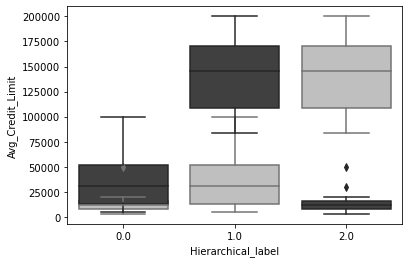

In [72]:
sns.boxplot(x = data_original['KMeans_label'], y = data_original['Avg_Credit_Limit'], color = "0.75");
sns.boxplot(x = data_original['Hierarchical_label'], y = data_original['Avg_Credit_Limit'], color = "0.25");
plt.show()

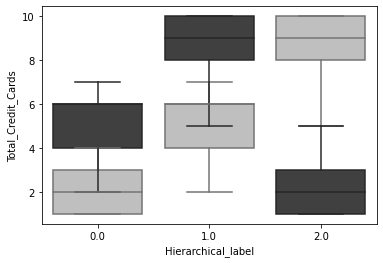

In [73]:
sns.boxplot(x = data_original['KMeans_label'], y = data_original['Total_Credit_Cards'], color = "0.75");
sns.boxplot(x = data_original['Hierarchical_label'], y = data_original['Total_Credit_Cards'], color = "0.25");
plt.show()

> The plots show similar ranges for different groups according to both methods.

### Plot the Clusters

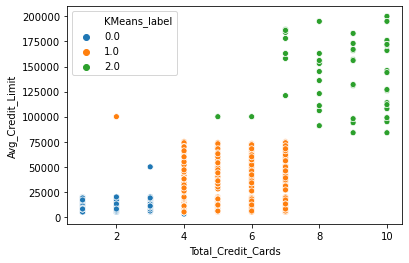

In [74]:
sns.scatterplot(x = data_original['Total_Credit_Cards'], y = data_original['Avg_Credit_Limit'], hue = data_original['KMeans_label']);

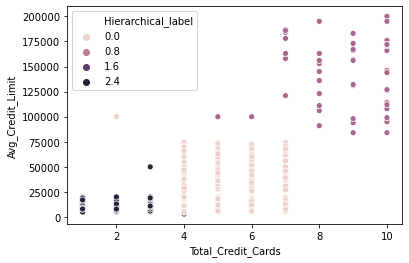

In [75]:
sns.scatterplot(x = data_original['Total_Credit_Cards'], y = data_original['Avg_Credit_Limit'], hue = data_original['Hierarchical_label']);

> The clusters formed by KMeans and Hierarchical look the same, with about few wrong data points in the cluster.

### Comparing Silhoutte Scores

In [76]:
print('Silhoutte Scores for')
print('KMeans Clustering: ', score_kmeans)
print('Hierarchical Clustering: ', score_hierarchical )

Silhoutte Scores for
KMeans Clustering:  0.5395774903633755
Hierarchical Clustering:  0.5904746612930871


> Silhoutte is a method to determine optimal number of clusters for a given dataset. It defines as a coefficient of measure of how similar an observation to its own cluster compared to that of other clusters. The range of silhouette coefficient varies between -1 to 1. 1 value indicate that an observation is far from its neighbouring cluster and close to its own whereas -1 denotes that an observation is close to neighbouring cluster than its own cluster. The 0 value indicate the presence of observation on boundary of two clusters. <b>Since Silhoutte Score is highest/closer to 1 for Hierarchical clustering, hence it is the best method for this dataset. </b>

# 4. Evaluation/ Conclusion:

Both KMeans and Hierarchical clustering algorithms segment the customers into 3 clusters showing same following trends:

- <b>(Cluster name - High Customers)</b> The first cluster consists of people who have higher number of total credit cards and high average credit card limit. They mostly go online for their queries. 

- <b>(Cluster name - Low Customers)</b> The second cluster consists of people who have lowest number of total credit cards and lowest average credit card limit. They mostly call the bank for their concerns. 

- <b>(Cluster name - Medium Customers)</b> The third cluster consists of the average group of people who have average number of credit cards, and average credit card limit. They mostly go to the bank for their queries. 

In [77]:
print("SUMMARY: ")
print("\nClusters formed by KMeans:\n")
print(df_kmeans.set_index('Cluster no.'))
print("\nPercentage of customers in each cluster: \n")
print(data_original['KMeans_label'].value_counts(normalize = True)*100)

print("\nClusters formed by Hierarchical:\n")
print(df_hierarchical.set_index('Cluster no.'))
print("\nPercentage of customers in each cluster: \n")
print(data_original['Hierarchical_label'].value_counts(normalize = True)*100)


SUMMARY: 

Clusters formed by KMeans:

            Total Credit Cards Average Credit Limit Contact Method
Cluster no.                                                       
0                          Low                  Low     Make Calls
1                       Medium               Medium     Visit Bank
2                         High                 High   Visit Online

Percentage of customers in each cluster: 

1    58.473282
0    33.893130
2     7.633588
Name: KMeans_label, dtype: float64

Clusters formed by Hierarchical:

            Total Credit Cards Average Credit Limit Contact Method
Cluster no.                                                       
0                       Medium               Medium     Visit Bank
1                         High                 High   Visit Online
2                          Low                  Low     Make Calls

Percentage of customers in each cluster: 

0.0    58.473282
2.0    33.893130
1.0     7.633588
Name: Hierarchical_label, dtype: floa

><b>Conclusion: 
- 58% of the customers belong to the cluster with medium number of total credit cards, medium average credit limit and visit bank for their queries.
- 33% of the customers belong to the cluster with low number of total credit cards, low average credit limit and call bank for their queries.
- 7% of the customers belong to the cluster with high number of total credit cards, high average credit limit and visit online for their queries. </b>

## Answer Key Questions:

### Q1. How many different segments of customers are there?

There are 3 different segments of Credit Card Customers in the bank.

### Q2. How are these segments different from each other?

The first segment consists of people who have higher number of total credit cards and high average credit card limit. They mostly go online for their queries.

The second segment consists of people who have lowest number of total credit cards and lowest average credit card limit. They mostly call the bank for their concerns. 

The third segment consists of the average group of people who have average number of credit cards, and average credit card limit. They mostly go to the bank for their queries. 

### Q3. What are your recommendations to the bank on how to better market to and service these customers?

The strategy of the bank should be to retain the old customers and make efforts to add new customers. Here are some recommendations on how to retain different groups of old customers. 

<Br>
<b>
1. Group with people having medium number of credit cards, medium average credit card limit and visiting bank mostly.</b>
(Since majority of the customers belong to the cluster this is priority)

   - Offers promoting balance transfers and/or 0% APR pricing.
   - Supporting a direct mail campaign with email and/or other digital channels, wherever possible. Direct mail offers should lead with and amplify online response so prospects don’t have to leave home and physically mail applications. Check existing DM controls and remove references to in-person applications.
   - Credit card issuers will have to make sure that applications on mobile devices are easy to understand and complete — a good user-friendly design that encourages the consumer to complete the application instead of giving up in frustration.

<b>
2. Group with people having least number of credit cards, lower average credit card limit and making calls mostly.</b>

   - Test out a new approach of marketing by using social media.
   - Also take into consideration the expansion of VantageScore, which uses different metrics from FICO. The reason for this is changes in the metrics that determine credit eligibility. Credit card issuers will be able to advertise to a larger percentage of people who would be considered subprime e.g. students, or other people who might not use credit often. (Whereas FICO requires a full six months of credit scoring, VantageScore takes into account the very first month)
   - In order to promote online banking, the bank can incorporate account tracking within their mobile apps by adding features that automatically create budgets based on the card holder’s spending habits, bills, and incomes, and even auto deposit in their savings account for rainy days. This will become a good personal finance management tool.

<b>
3. Group with people having more number of credit cards, higher average credit card limit and visiting online mostly.</b>

   - Focus on promoting cash back cards and cards with accelerated earn on everyday spend e.g. groceries.
   - Elevating incentives for services that consumers are purchasing e.g. third party delivery apps or streaming services.
   - Card issuers can promote any regional or national partnership already in place, or card marketers can look to payment partners for existing incentives e.g. Visa may be able to support an issuer-partner with pre-negotiated merchant offers making it possible for all card issuers to tout attractive incentives with high-value brands.
   - Brand-related credit cards — such as those that offer Uber points — can get even more attractive for consumers, due to their relative value for users’ priorities.
   - Promote the mobile payment functionality offered by your card.

<b>
New Customers</b>:

   - Target the students or recently graduated by promoting credt cards that may feature the university's logo, accept applicants with no credit history or offer promotional interest rates that appeal to students with limited income.
   - To attract customers who like to travel, companies like airlines, hotel chains and motor vehicle manufacturers partner with card companies to offer cards with benefits like priority airport lounges, room upgrades and special gifts for purchases.
   - By giving customers cash back or points, credit card companies can use rewards systems to gain new customers and keep them. card companies may continue to offer rewards points or dollars based on the customer's purchase amount and type.
   - To target new customers who plan to make major purchases or transfer balances from other cards, card companies sometimes offer a period of several months to over a year where cardholders pay no interest or have a reduced rate. e.g. balance transfers often come with a fee of around 3 to 5 percent of the amount, card companies may waive it to gain new customers. Cards with annual fees may also have the fee waived for the first year to reduce the burden on the new customer.
   - Partner with major retail stores to offer branded cards and give flat rate/ percentage discounts to attract new customers who are the stores's frequent shoppers.
   - Bank can offer secure credit cards to attract new customers who have no credit or bad credit and want to improve their credit history. These cards require a security deposit or bank account hold and may charge higher interest rates than unsecured cards do. 
   - New customers with very good credit score can be offered preferred, gold, platinum or signature cards. These cards tend to come with higher rewards, special perks, lower interest rates and cash introductory bonuses.

<b>
Improve service</b>:

   - Using technology like social media or mobile phones to get immediate customer feedback on the quality of service.
